In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [172]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")


In [215]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [173]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
train.shape

(42000, 785)

In [174]:
from sklearn.model_selection import train_test_split
X= train.drop(columns = 'label')
Y = train.label

In [175]:
X.shape

(42000, 784)

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

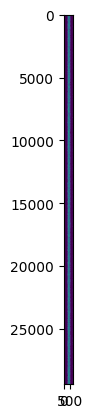

In [177]:
plt.imshow(X_train)

In [178]:
X_train.shape

(29400, 784)

In [179]:
X_test.shape

(12600, 784)

In [180]:
X_train = X_train.to_numpy().reshape(29400, 28, 28)

In [181]:
X_test = X_test.to_numpy().reshape(12600, 28, 28)


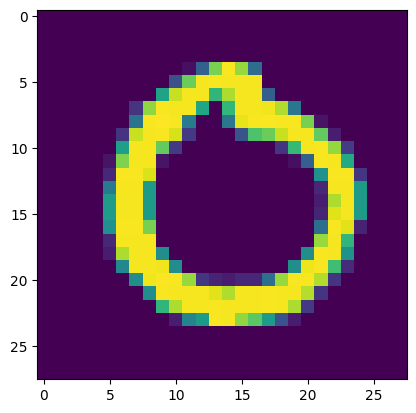

In [182]:
plt.imshow(X_train[0])

In [183]:
X_train = X_train/255
X_test = X_test/255

In [184]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(192, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [185]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 192)            │       150,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,650 (596.29 KB)

 Trainable params: 152,650 (596.29 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [187]:
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Epoch 1/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8371 - loss: 0.5762 - val_accuracy: 0.9366 - val_loss: 0.2130
Epoch 2/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9507 - loss: 0.1661 - val_accuracy: 0.9529 - val_loss: 0.1608
Epoch 3/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9695 - loss: 0.1030 - val_accuracy: 0.9563 - val_loss: 0.1434
Epoch 4/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9811 - loss: 0.0695 - val_accuracy: 0.9648 - val_loss: 0.1170
Epoch 5/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9869 - loss: 0.0490 - val_accuracy: 0.9639 - val_loss: 0.1243
Epoch 6/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9893 - loss: 0.0395 - val_accuracy: 0.9673 - val_loss: 0.1146
Epoch 7/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9926 - loss: 0.0267 - val_accuracy: 0.9668 - val_loss: 0.1174
Epoch 8/25
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9945 - loss: 0.0212 - val_accuracy: 0.

In [188]:
history.history

{'accuracy': [0.9026360511779785,
  0.9545493125915527,
  0.9688350558280945,
  0.9795493483543396,
  0.9847363829612732,
  0.9879676699638367,
  0.9911564588546753,
  0.9934098720550537,
  0.9962584972381592,
  0.9965136051177979,
  0.9966411590576172,
  0.9974064826965332,
  0.9969812631607056,
  0.9989370703697205,
  0.9987244606018066,
  0.9973214268684387,
  0.9983418583869934,
  0.9991496801376343,
  0.9976615905761719,
  0.9991496801376343,
  1.0,
  0.9999575018882751,
  0.9999149441719055,
  0.9936224222183228,
  0.9984694123268127],
 'loss': [0.3432859778404236,
  0.1552661508321762,
  0.10340820997953415,
  0.07202044129371643,
  0.05401357635855675,
  0.0416531041264534,
  0.03143008425831795,
  0.02494717575609684,
  0.016487618908286095,
  0.013865486718714237,
  0.012857303954660892,
  0.010412830859422684,
  0.010377363301813602,
  0.005673002917319536,
  0.005758689250797033,
  0.010390211828052998,
  0.006104904692620039,
  0.003647557459771633,
  0.008183003403246403,

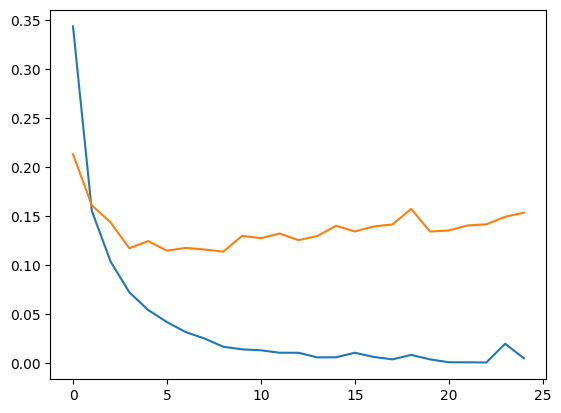

In [192]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

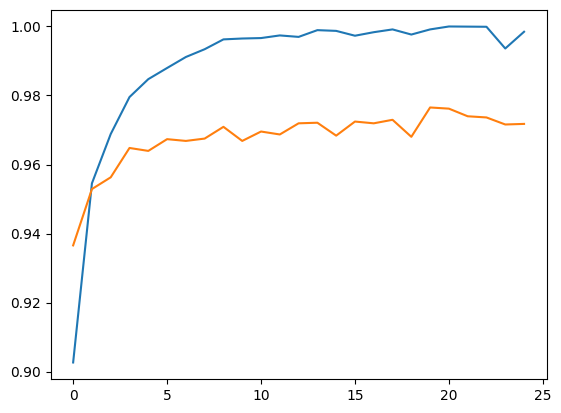

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [194]:
y_prob = model.predict(X_test)

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [195]:
y_prob

array([[1.3028615e-13, 5.2407787e-16, 9.3130976e-15, ..., 5.2772748e-07,
        3.9794893e-13, 9.9999934e-01],
       [2.3331168e-07, 3.4937893e-11, 1.8932350e-06, ..., 6.9183670e-06,
        1.8975162e-07, 6.2051193e-05],
       [5.0811296e-22, 1.8320093e-10, 4.0661526e-01, ..., 3.9181958e-13,
        5.9748938e-15, 1.0388423e-25],
       ...,
       [2.0264596e-16, 9.9999958e-01, 3.6996985e-07, ..., 1.0088228e-09,
        1.2277412e-09, 1.1075690e-17],
       [2.0289517e-23, 3.0458000e-19, 1.4363548e-18, ..., 1.9759294e-28,
        7.9398673e-13, 1.2591438e-12],
       [1.6399645e-06, 3.7335360e-12, 9.9998671e-01, ..., 2.0984257e-09,
        8.1552676e-10, 1.0827690e-05]], dtype=float32)

In [198]:
y_hat = y_prob.argmax(axis = 1)

In [199]:
y_hat

array([9, 5, 3, ..., 1, 3, 2])

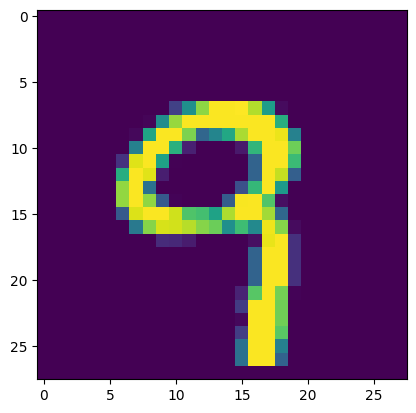

In [203]:
plt.imshow(X_test[0])

In [205]:
test.shape

(28000, 784)

In [206]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
ind = test.index + 1

In [207]:
test = test.to_numpy().reshape(28000, 28,28)

In [209]:
y_hat_target = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [211]:

submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [212]:
submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [237]:
test_f = pd.DataFrame() 

In [227]:
y_hat_target = y_hat_target.argmax(axis = 1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [245]:
test_f['ImageId'] = ind
test_f['Label'] = y_hat_target

In [246]:
test_f

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [247]:
test_f.to_csv('test_f.csv', index=False)

In [242]:
from sklearn.metrics import accuracy_score


In [243]:
accuracy_score(Y_test, y_hat)

0.9707936507936508

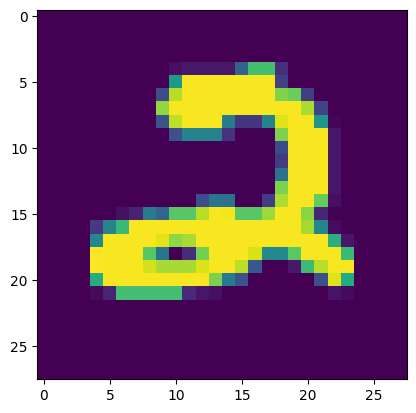

In [253]:
plt.imshow(test[0])

In [252]:
test = test.to_numpy().reshape(28000, 28, 28)